# Workshop5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Первый конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf)
- [Второй конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture03-linregr.pdf)
- [Теория из курса ODS](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic04_linear_models/topic4_linear_models_part1_mse_likelihood_bias_variance.ipynb)
- [Материалы из курса от МФТИ](https://www.coursera.org/specializations/machine-learning-data-analysis)
- [Статья про лин.рег. от ODS на habrahabr](https://habrahabr.ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик. Это задание будет не то чтобы про линейную регрессию, но про попытку построить модель для предсказания цен на дом. В принципе я бы мог еще добавить заданий на более тщательный отбор признаков, логарифмирование признаков, у которых сильное смещение "скоса"(skew). Можно было бы анализировать и выпрямлять распределение целевой переменной. Можно было бы генерировать новые признаки из существующих, строить ансамбли моделей. Но мы ограничимся, пока что.......

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [179]:
df = pd.read_csv('/content/drive/MyDrive/ml-courses/ml-advanced/house_prices.csv', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
assert df.shape == (1460, 80)

In [25]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание:
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

<ipython-input-16-4c4fcb852952>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', color='red')


Text(0, 0.5, 'Density')

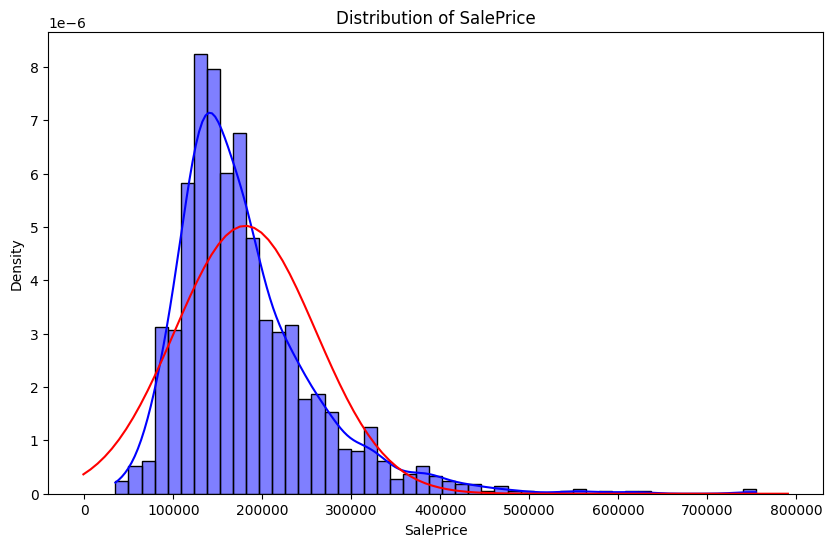

In [16]:
from scipy.stats import norm, kurtosis, probplot

plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, stat='density', color='blue', alpha=0.5)

mu, sigma = norm.fit(df['SalePrice'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', color='red')

plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Density')

In [17]:
kurt = kurtosis(df['SalePrice'])
print(f'Kurtosis (excess kurtosis) of SalePrice: {kurt}')

Kurtosis (excess kurtosis) of SalePrice: 6.509812011089439


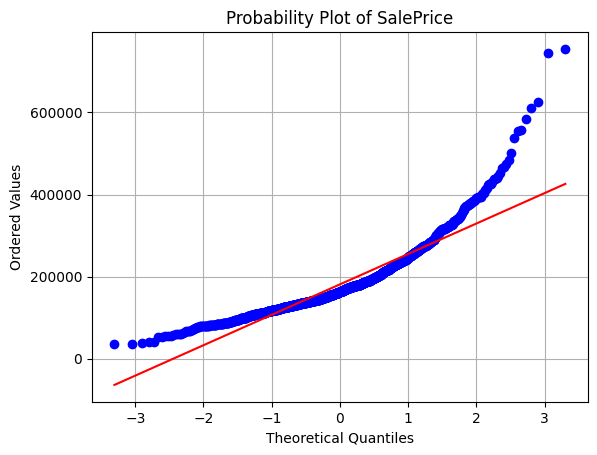

In [20]:
probplot(df['SalePrice'], plot=plt)
plt.title('Probability Plot of SalePrice')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

plt.grid(True)
plt.show()

Что вы можете сказать по поводу выборки основываясь на probplot?

**Ответ**

Тяжелые хвосты распределения: график probplot показывает, что хвосты распределения (то есть значения на краях) отклоняются от ожидаемой линии, это может свидетельствовать о наличии тяжелых хвостов (т.е. наличии значительного количества экстремальных значений).

## 1.2 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

<Figure size 600x600 with 0 Axes>

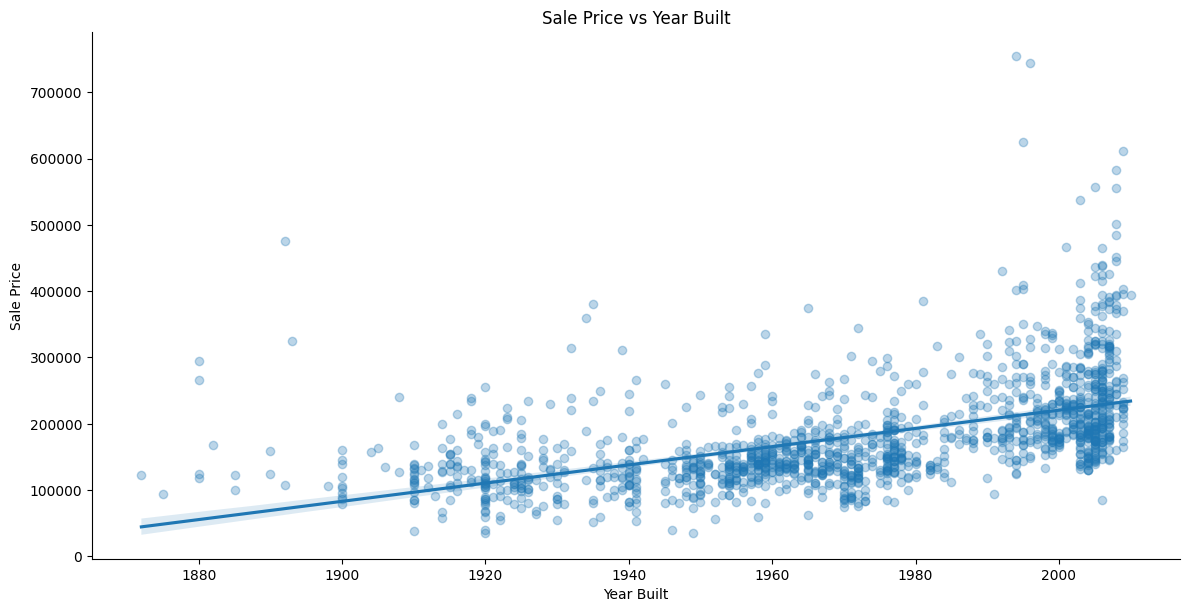

In [37]:
plt.figure(figsize=(6, 6))
sns.lmplot(x='YearBuilt', y='SalePrice', data=df, aspect=2, height=6, scatter_kws={'alpha':0.3})
plt.title('Sale Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

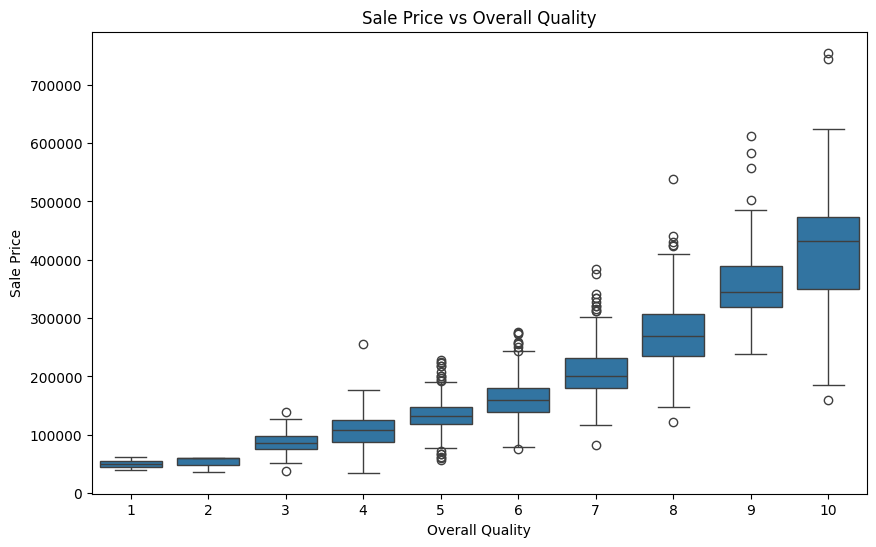

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Sale Price vs Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

<Figure size 600x600 with 0 Axes>

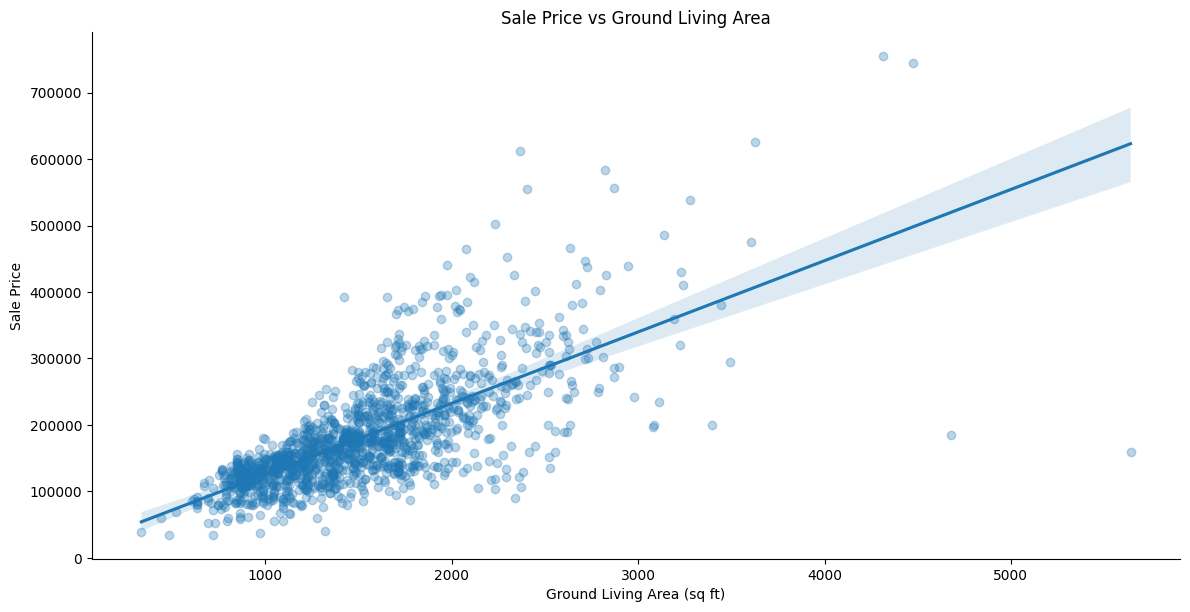

In [42]:
plt.figure(figsize=(6, 6))
sns.lmplot(x='GrLivArea', y='SalePrice', data=df, aspect=2, height=6, scatter_kws={'alpha':0.3})
plt.title('Sale Price vs Ground Living Area')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

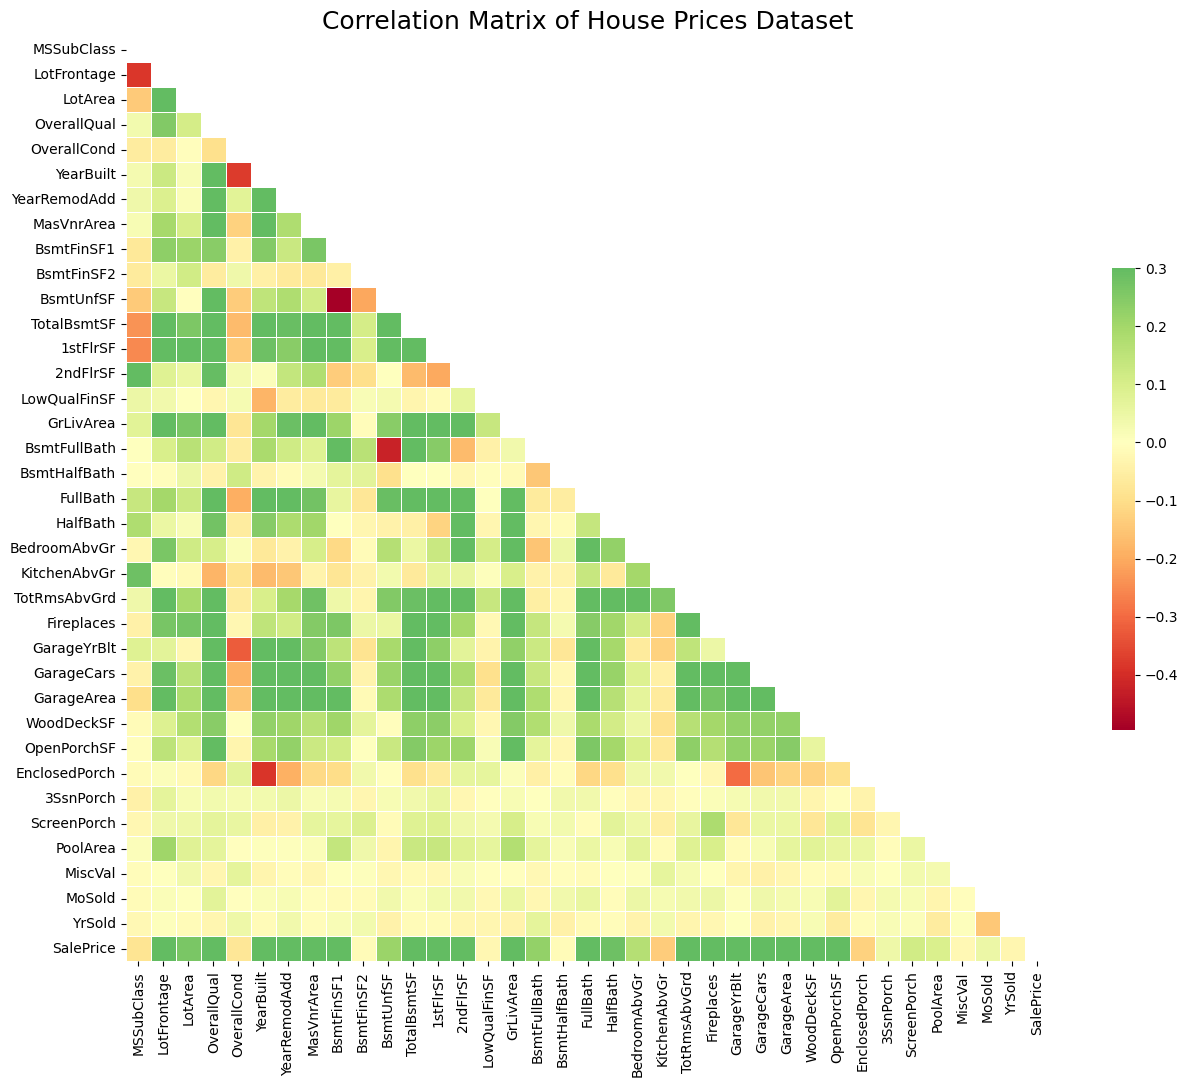

In [106]:
numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))

sns.heatmap(corr, mask=mask, cmap='RdYlGn', vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of House Prices Dataset', fontsize=18)
plt.show()

Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной.

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции.
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

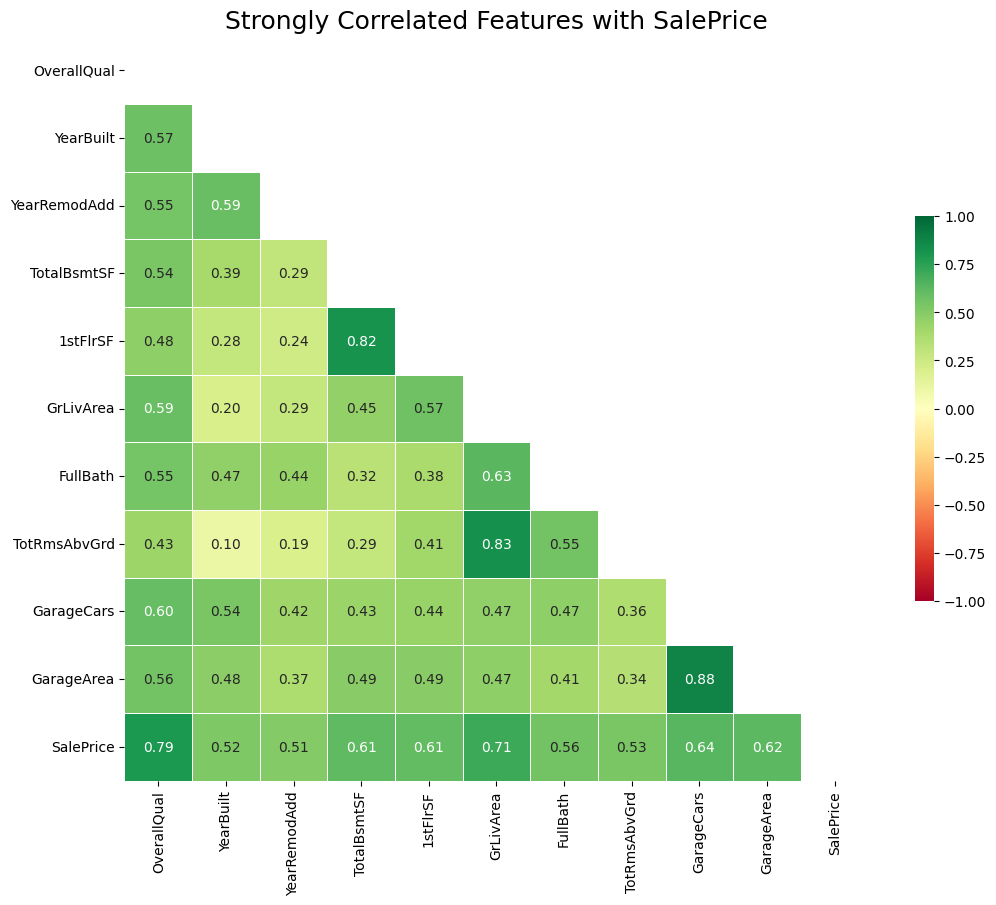

Сильно коррелируемые признаки с SalePrice (корреляция > 0.5 по абсолютному значению):
OverallQual: 0.79
YearBuilt: 0.52
YearRemodAdd: 0.51
TotalBsmtSF: 0.61
1stFlrSF: 0.61
GrLivArea: 0.71
FullBath: 0.56
TotRmsAbvGrd: 0.53
GarageCars: 0.64
GarageArea: 0.62
SalePrice: 1.00


In [180]:
strong_corr = corr[abs(corr["SalePrice"]) > 0.5]["SalePrice"]
strong_corr_features = strong_corr.index.tolist()

strong_corr_matrix = numeric_df[strong_corr_features].corr()

mask = np.triu(np.ones_like(strong_corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))

sns.heatmap(strong_corr_matrix, mask=mask, cmap='RdYlGn', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f', cbar_kws={"shrink": .5})

plt.title('Strongly Correlated Features with SalePrice', fontsize=18)
plt.show()

print("Сильно коррелируемые признаки с SalePrice (корреляция > 0.5 по абсолютному значению):")
for feature in strong_corr_features:
    print(f"{feature}: {strong_corr[feature]:.2f}")

## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

In [181]:
# Посчитать общее количество пропущенных данных по каждому признаку
missing_data = df.isnull().sum()
missing_data

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [182]:
# Посчитать долю пропущенных данных выборки
missing_data_percent = (missing_data / len(df)) * 100
missing_data_percent

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [183]:
# Удалить признаки, доля пропущенных которых больше 10%
features_to_drop = missing_data_percent[missing_data_percent > 10].index
df = df.drop(columns=features_to_drop)

In [184]:
# Заполнить пропущенные категориальные значения словом 'unknown'
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features] = df[categorical_features].fillna('unknown')

In [185]:
# Заполнить пропущенные числовые значения средним значением
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500


## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [187]:
df = pd.get_dummies(df)
df.shape[1]

276

In [188]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

df = shuffle(df, random_state=42)
X = df.drop(columns=['SalePrice'], axis=1)
y = df['SalePrice']

scaler = StandardScaler()
X = scaler.fit_transform(X)

## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [189]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
for coef, col in sorted(zip(lr.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))

51.4249 	 MiscVal
174.4999 	 OpenPorchSF
-215.8638 	 BsmtHalfBath
265.2038 	 EnclosedPorch
329.6317 	 BsmtFullBath
428.1218 	 HalfBath
-450.25 	 YrSold
-722.9735 	 GarageYrBlt
-789.977 	 MSSubClass
945.4431 	 3SsnPorch
-1222.125 	 MoSold
1590.5592 	 ScreenPorch
1655.4756 	 Fireplaces
1681.2928 	 WoodDeckSF
1910.936 	 FullBath
1919.192 	 TotRmsAbvGrd
2091.3241 	 YearRemodAdd
2475.1088 	 MasVnrArea
-2742.1816 	 BedroomAbvGr
-2769.1833 	 KitchenAbvGr
3172.0895 	 GarageCars
3420.5674 	 PoolArea
3894.9656 	 GarageArea
6340.1304 	 OverallCond
7590.7455 	 LotArea
9192.3392 	 OverallQual
9514.3381 	 YearBuilt
-39367097746921.875 	 Functional_Typ
-48164885370360.75 	 GarageType_BuiltIn
-69740388278536.0 	 GarageType_Attchd
-83451693742802.0 	 Functional_Mod
-86395291762860.31 	 RoofStyle_Mansard
-113421036714649.12 	 Exterior1st_AsbShng
-113421036715307.9 	 Exterior1st_HdBoard
146359832370304.56 	 BsmtFinSF2
-146451546414703.0 	 GarageType_Basment
150816745227712.0 	 SaleType_CWD
-1603465892627

<Axes: xlabel='coef', ylabel='columns'>

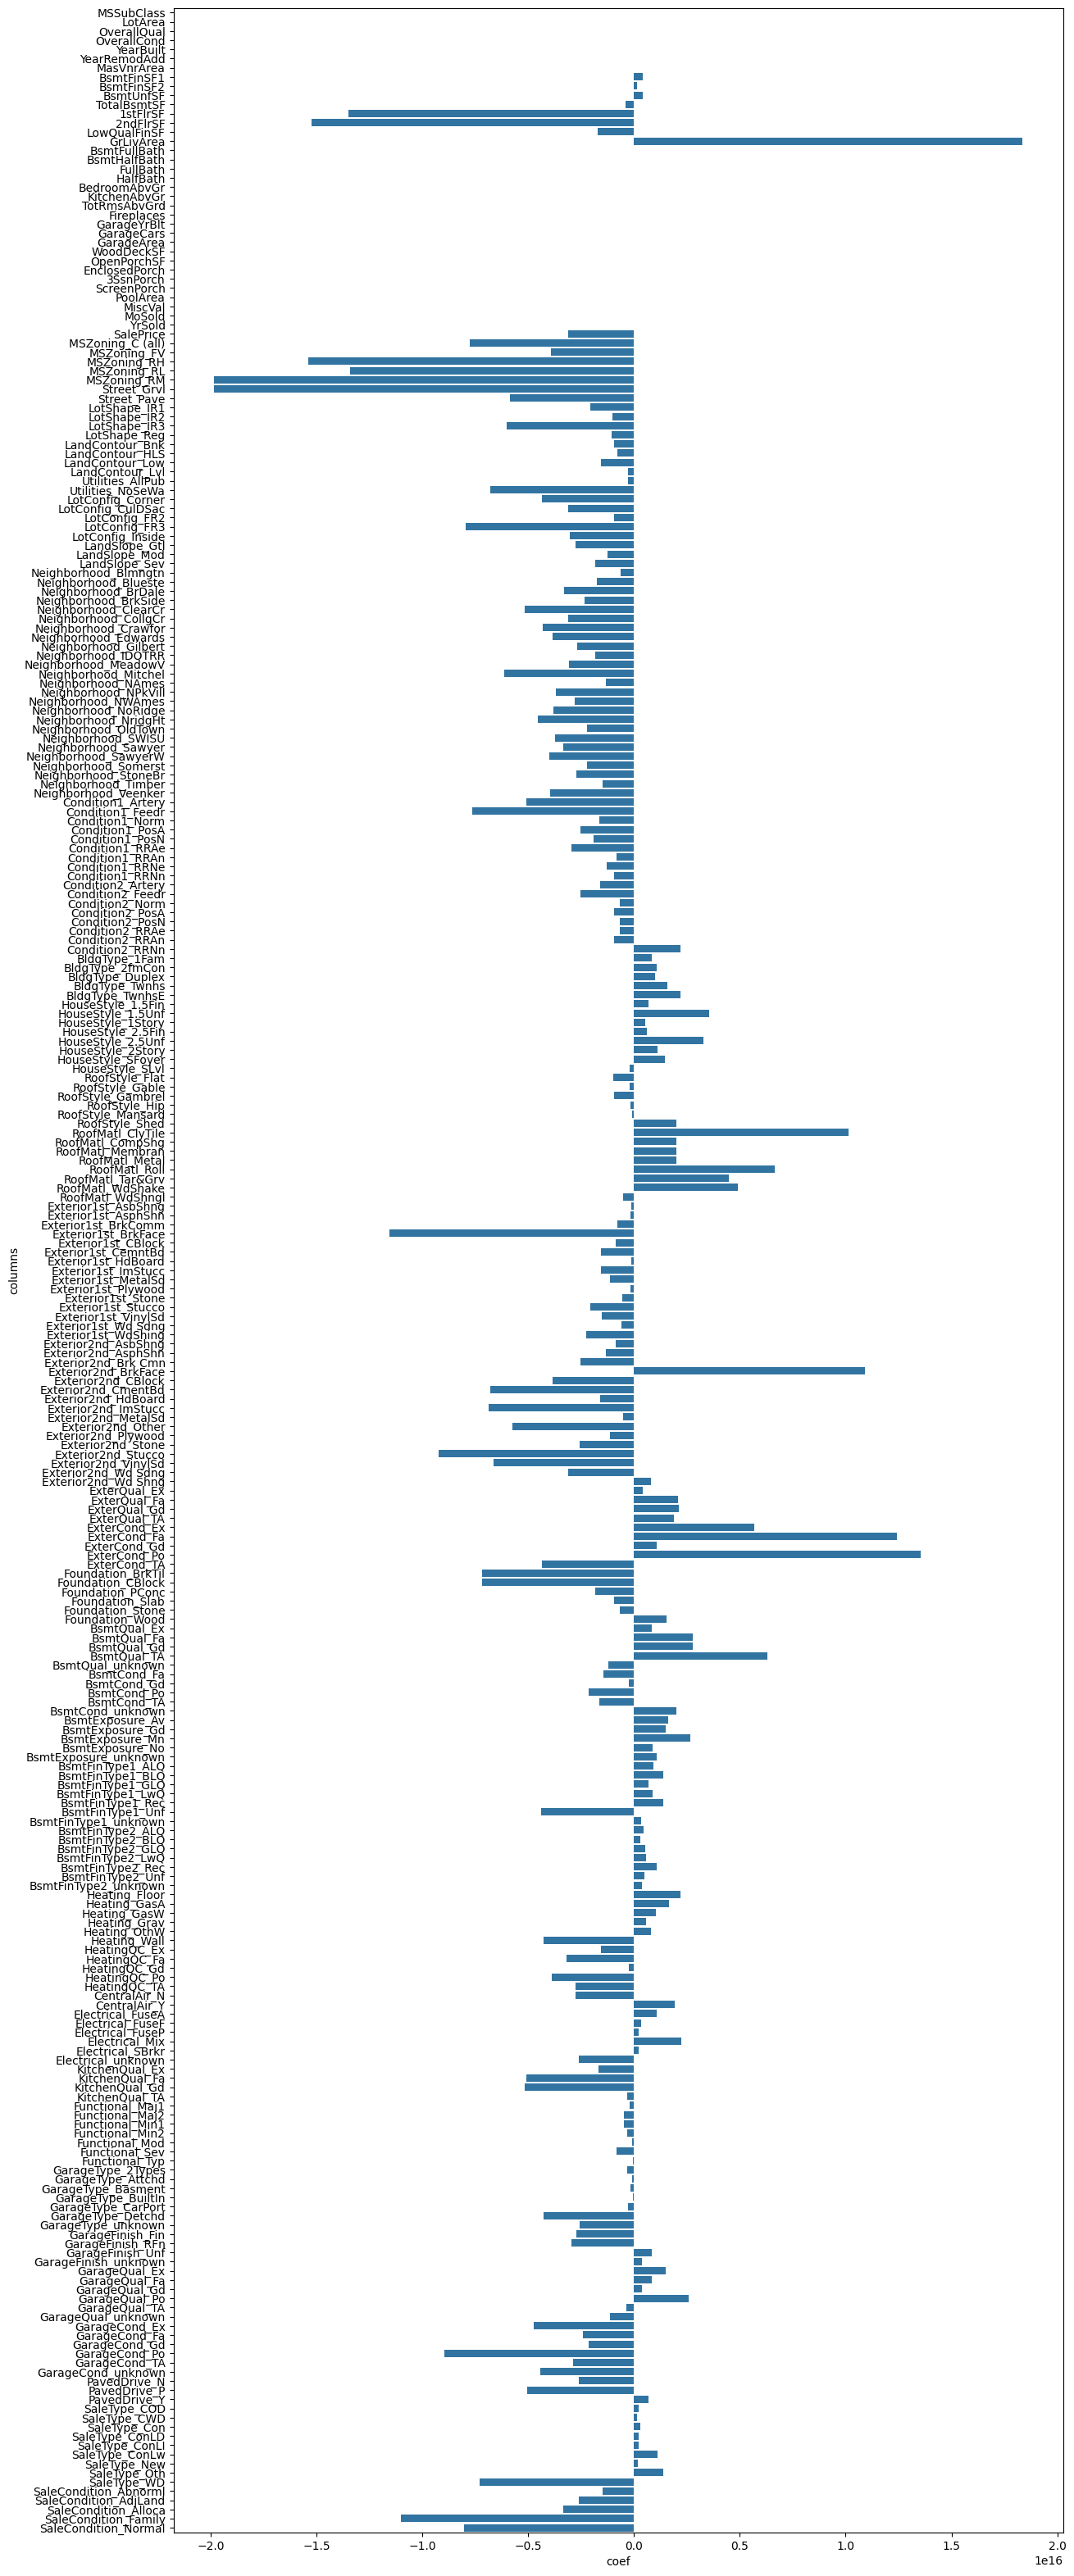

In [190]:
# Магнитуда признаков
plt.figure(figsize=(14,40))
sns.barplot(y='columns', x='coef',data=pd.DataFrame(list(zip(lr.coef_, df.columns)), columns=["coef", "columns"]))

In [191]:
from sklearn.model_selection import cross_val_score

errors = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_absolute_error')
print(errors)
error = abs(np.mean(errors))
print("error={:0.3f}, std={:0.4f}".format(error, np.std(errors)))

[-2.04912673e+16 -1.42366572e+16 -4.99244873e+15 -5.65781370e+16
 -1.43892125e+16]
error=22137544560969136.000, std=17918033475701358.0000


К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

In [192]:
from sklearn.linear_model import Lasso, Ridge

alphas = np.arange(1, 500, 5)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

i = 0
for alpha in alphas:
    lasso = Lasso(alpha = alpha, random_state=42)
    lasso.fit(X, y)
    coefs_lasso[i, :] = lasso.coef_

    ridge = Ridge(alpha = alpha, random_state=42)
    ridge.fit(X, y)
    coefs_ridge[i, :] = ridge.coef_

    i += 1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.276e+10, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.277e+09, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.410e+09, tolerance: 9.208e

Text(0.5, 1.0, 'Ridge')

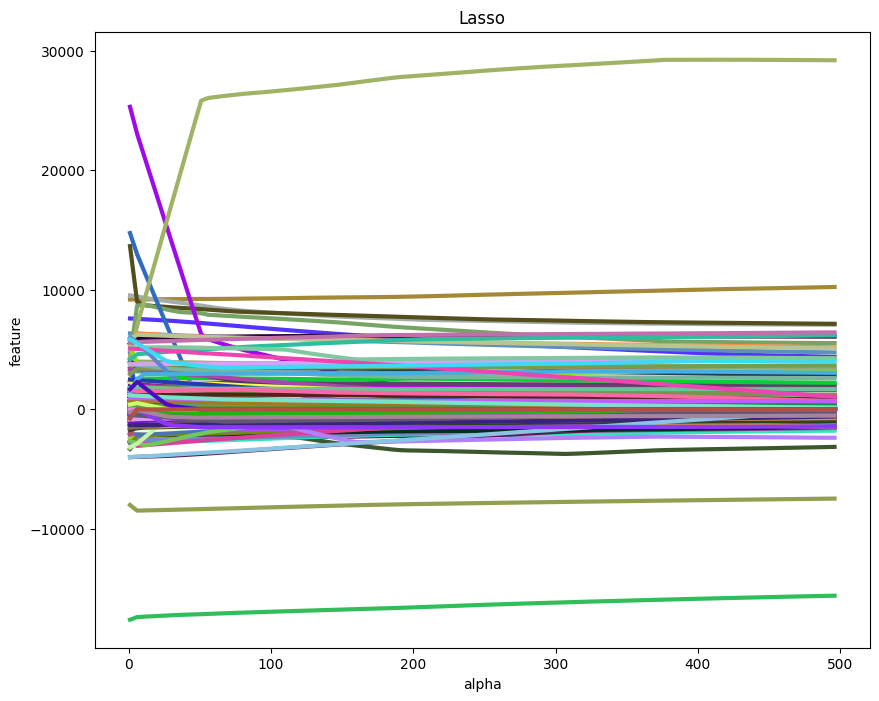

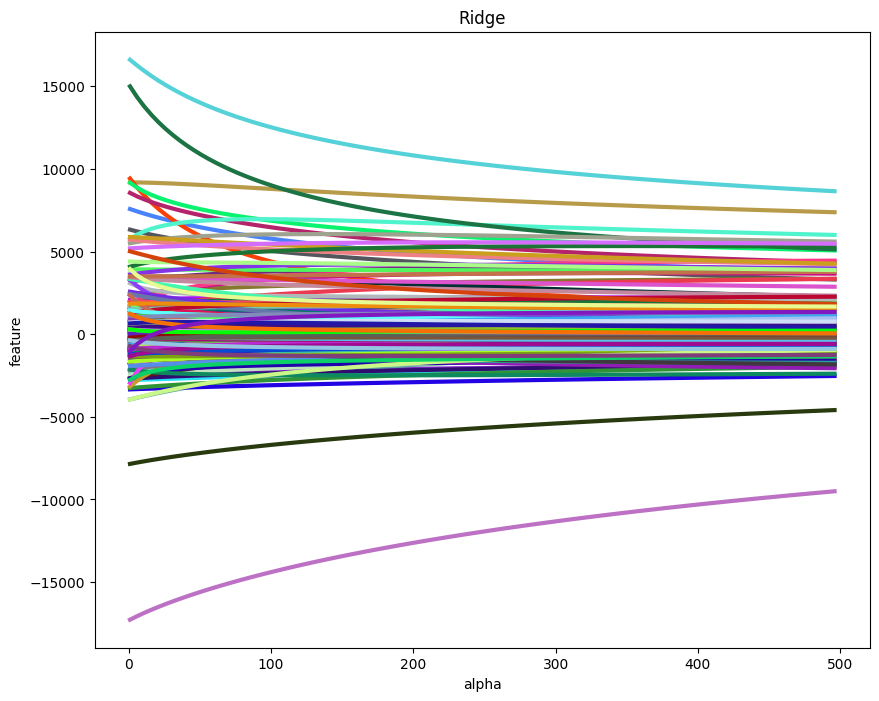

In [193]:
plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
# plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature")
plt.title("Lasso")

plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
# plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature")
plt.title("Ridge")

## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36943915222.65192, tolerance: 764860686.122989
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1611612434.85083, tolerance: 675986292.3077184
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36046078813.56995, tolerance: 675986292.3077184
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarni

alpha = 50.0


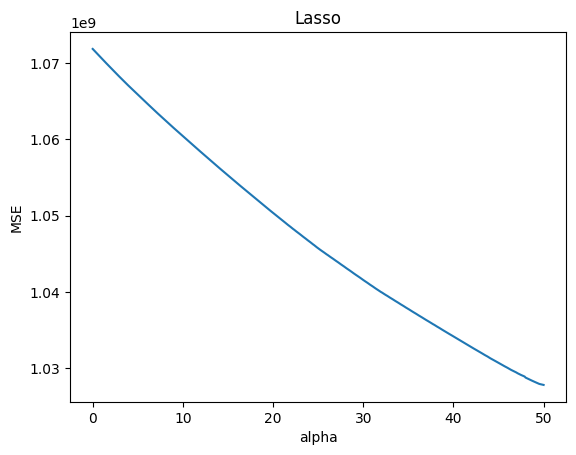

In [194]:
from sklearn.linear_model import LassoCV

alphas = np.linspace(0.001, 50, 500)
lasso_cv = LassoCV(alphas=alphas, random_state=42)
lasso_cv.fit(X, y)

mean_mse = np.mean(lasso_cv.mse_path_, axis = 1)

plt.plot(lasso_cv.alphas_, mean_mse)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso')
print('alpha = {}'.format(lasso_cv.alpha_))

In [195]:
from sklearn.model_selection import cross_val_score

errors = cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=5, scoring='neg_mean_absolute_error')
print(errors)
error = abs(np.mean(errors))
print("error={:0.3f}, std={:0.4f}".format(error, np.std(errors)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.612e+09, tolerance: 6.760e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.614e+09, tolerance: 7.478e+08
  model = cd_fast.enet_coordinate_descent(


[-15363.49013773 -18860.8745835  -17077.1618873  -18361.41941168
 -16308.31707806]
error=17194.253, std=1287.6483


## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("train_shape={}, test_shape={}".format(X_train.shape, X_test.shape))

train_shape=(978, 275), test_shape=(482, 275)


Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

In [197]:
from sklearn.metrics import mean_squared_error

reg = Lasso(lasso_cv.alpha_)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+09, tolerance: 6.231e+08
  model = cd_fast.enet_coordinate_descent(


Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

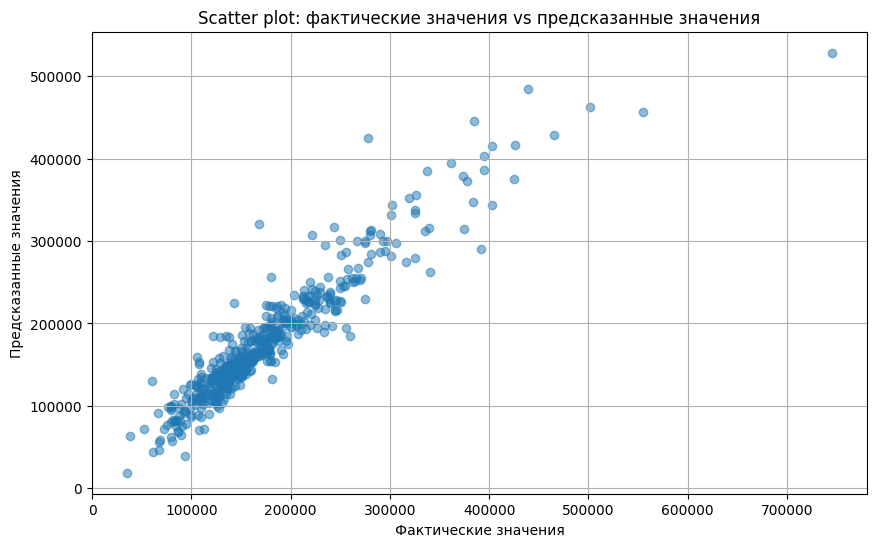

In [198]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha задает прозрачность точек для лучшей видимости наложения
plt.title('Scatter plot: фактические значения vs предсказанные значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.grid(True)
plt.show()

In [199]:
from sklearn.metrics import mean_squared_error

# Построим таблицу предсказание / оригинальное значение / MSE / MAE
prediction = pd.DataFrame(np.vstack((y_pred, y_test)).T, columns=["pred", "target"])
prediction['MSE'] = np.power(prediction['pred'] - prediction['target'], 2)
prediction['MAE'] = np.abs(prediction['pred'] - prediction['target'])

In [200]:
# Сортируем по убыванию ошибки
prediction.sort_values(by='MAE', ascending=False, inplace=True)
prediction.head()

,pred,target,MSE,MAE
415,528355.907867,745000.0,4.693466e+10,216644.092133
17,320961.993874,168500.0,2.324466e+10,152461.993874
236,424867.248725,278000.0,2.156999e+10,146867.248725
421,290671.835121,392000.0,1.026740e+10,101328.164879
464,456096.979839,555000.0,9.781807e+09,98903.020161


In [201]:
# Сортируем по возрастанию ошибки
prediction.sort_values(by='MAE', inplace=True)
prediction.head()

,pred,target,MSE,MAE
432,170028.687818,170000.0,822.990920,28.687818
360,137529.101718,137500.0,846.910009,29.101718
186,88096.853252,88000.0,9380.552435,96.853252
43,115885.227800,116000.0,13172.657927,114.772200
289,142816.983216,142953.0,18500.565397,136.016784


In [202]:
print("общая ошибка предсказателя в количестве прокатов = {:0.1f}\nвсего прокатов = {:0.1f}\nдоля ошибок = {:.2%}"
      .format(prediction.MAE.sum(), prediction.target.sum(), prediction.MAE.sum() / prediction.target.sum()))

общая ошибка предсказателя в количестве прокатов = 8192295.8
всего прокатов = 84700001.0
доля ошибок = 9.67%


Text(0, 0.5, 'Target/Predicted value')

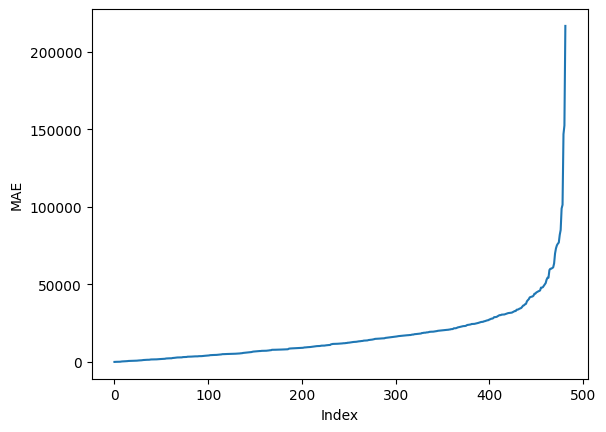

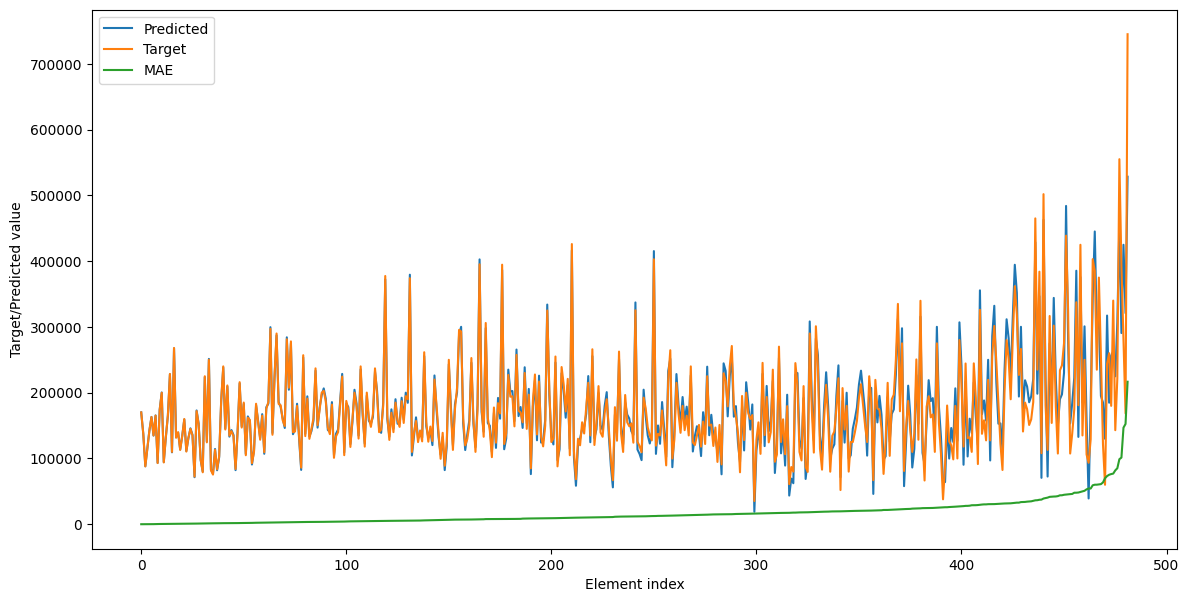

In [203]:
plt.plot(range(0, prediction.shape[0]), prediction['MAE'])
plt.xlabel("Index")
plt.ylabel("MAE")

plt.figure(figsize=(14,7))

plt.plot(range(0, prediction.shape[0]), prediction['pred'])
plt.plot(range(0, prediction.shape[0]), prediction['target'])
plt.plot(range(0, prediction.shape[0]), prediction['MAE'])
plt.legend(["Predicted", "Target", "MAE"])

plt.xlabel("Element index")
plt.ylabel("Target/Predicted value")

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [204]:
df = df[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "SalePrice"]]

df = shuffle(df, random_state=42)
X = df.drop(columns=['SalePrice'], axis=1)
y = df['SalePrice']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [205]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X, y)

Lasso(alpha=1)

In [206]:
errors = cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=5, scoring='neg_mean_absolute_error')
print(errors)
error = abs(np.mean(errors))
print("error={:0.3f}, std={:0.4f}".format(error, np.std(errors)))

[-21705.6139426  -26491.95417526 -23182.37676058 -27449.15761428
 -22386.64667635]
error=24243.150, std=2295.4973


Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.